<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/Guia_Vis%C3%A3o_Computacional/Vis%C3%A3o_Computacional_Guia_2_Redes_neurais_convolucionais_para_classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neurais convolucionais para classificação de imagens

## Importação das bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.14.0'

## Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/PGEBM/Treinamento_TensorFlow/Curso - Visão Computacional/Visão Computacional Guia Completo/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

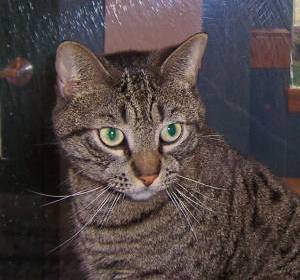

In [4]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1.jpg')

In [14]:
imagem_cat = tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1.jpg')

In [15]:
type(imagem_cat)

PIL.JpegImagePlugin.JpegImageFile

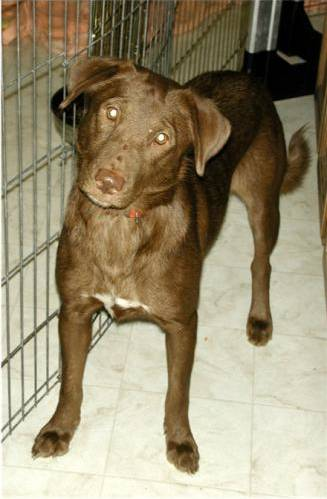

In [5]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.1.jpg')

In [16]:
imagem_dog = tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.1.jpg')

In [17]:
type(imagem_dog)

PIL.JpegImagePlugin.JpegImageFile

## Base de treinamento e teste

#### Dataset Treino

In [6]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

dataset_treinamento = gerador_treinamento.flow_from_directory('/content/cat_dog_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [7]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
dataset_treinamento.class_indices

{'cat': 0, 'dog': 1}

#### Dataset Teste

In [9]:
gerador_teste = ImageDataGenerator(rescale=1./255)

dataset_teste = gerador_teste.flow_from_directory('/content/cat_dog_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [10]:
network = Sequential()

# Camadas de Convolução
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

# Camada de Flatten
network.add(Flatten())

# Camadas Densas
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))

# Camada de saída
network.add(Dense(units = 2, activation='softmax'))

In [11]:
(6272 + 2) / 2

3137.0

In [12]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 3137)              1

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = network.fit(dataset_treinamento, epochs=10)

Epoch 1/10
125/125 [==============================] - 20s 76ms/step - loss: 0.7871 - accuracy: 0.5470
Epoch 2/10
125/125 [==============================] - 10s 76ms/step - loss: 0.6664 - accuracy: 0.6033
Epoch 3/10
125/125 [==============================] - 10s 76ms/step - loss: 0.6245 - accuracy: 0.6453
Epoch 4/10
125/125 [==============================] - 10s 76ms/step - loss: 0.5982 - accuracy: 0.6733
Epoch 5/10
125/125 [==============================] - 10s 77ms/step - loss: 0.5760 - accuracy: 0.6913
Epoch 6/10
125/125 [==============================] - 10s 78ms/step - loss: 0.5833 - accuracy: 0.6933
Epoch 7/10
125/125 [==============================] - 10s 77ms/step - loss: 0.5494 - accuracy: 0.7140
Epoch 8/10
125/125 [==============================] - 10s 77ms/step - loss: 0.5244 - accuracy: 0.7368
Epoch 9/10
125/125 [==============================] - 10s 77ms/step - loss: 0.4951 - accuracy: 0.7570
Epoch 10/10
125/125 [==============================] - 10s 77ms/step - loss: 0.500

## Avaliação da rede neural

In [ ]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

1000/1000 [==============================] - 2s 2ms/step


array([[0.6167488 , 0.38325122],
       [0.39255494, 0.6074451 ],
       [0.32102445, 0.6789755 ],
       ...,
       [0.04809947, 0.9519005 ],
       [0.2919149 , 0.7080851 ],
       [0.3243847 , 0.6756153 ]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.705

In [ ]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[301, 199],
       [ 96, 404]])

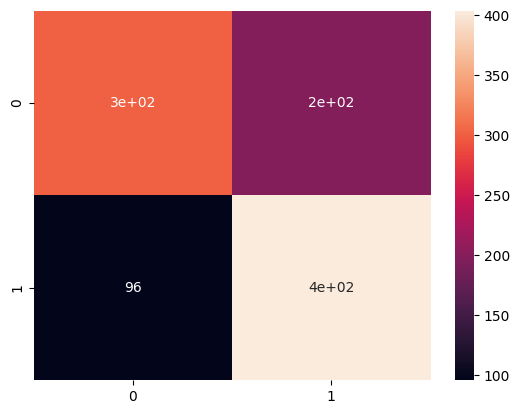

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       500
           1       0.67      0.81      0.73       500

    accuracy                           0.70      1000
   macro avg       0.71      0.71      0.70      1000
weighted avg       0.71      0.70      0.70      1000



## Salvar e carregar a rede neural

In [ ]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

<ipython-input-25-32bf80f9a744>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, '/content/weights.hdf5')


In [ ]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bia

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 3137)              1

## Classificação de uma única imagem

In [ ]:
imagem = cv2.imread('/content/cat_dog_2/test_set/cat/cat.3500.jpg')

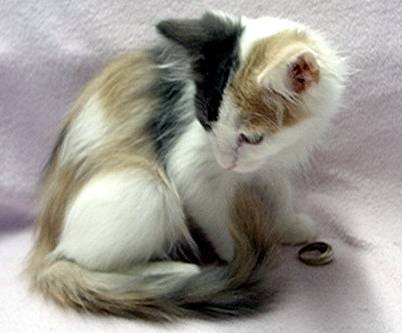

In [ ]:
cv2_imshow(imagem)

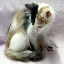

In [ ]:
imagem = cv2.resize(imagem, (64, 64))
cv2_imshow(imagem)

In [ ]:
imagem = imagem / 255
imagem

array([[[0.79607843, 0.77254902, 0.77647059],
        [0.78431373, 0.76078431, 0.76470588],
        [0.82745098, 0.80392157, 0.80392157],
        ...,
        [0.76078431, 0.73333333, 0.74509804],
        [0.77254902, 0.74509804, 0.75686275],
        [0.74509804, 0.71764706, 0.72941176]],

       [[0.81176471, 0.78823529, 0.79215686],
        [0.81568627, 0.79215686, 0.79607843],
        [0.78431373, 0.76078431, 0.76470588],
        ...,
        [0.76470588, 0.74117647, 0.75294118],
        [0.76862745, 0.74117647, 0.75294118],
        [0.75686275, 0.72941176, 0.74117647]],

       [[0.78431373, 0.76078431, 0.76470588],
        [0.78039216, 0.75686275, 0.76078431],
        [0.78039216, 0.75686275, 0.76078431],
        ...,
        [0.74509804, 0.71764706, 0.72941176],
        [0.74901961, 0.72156863, 0.73333333],
        [0.72156863, 0.69803922, 0.70980392]],

       ...,

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97647059, 0.97647059, 0.97647059],
        [0.98823529, 0

In [ ]:
imagem.shape

(64, 64, 3)

In [ ]:
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [ ]:
resultado = network_loaded(imagem)
resultado

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.58044875, 0.41955128]], dtype=float32)>

In [ ]:
resultado = np.argmax(resultado)
resultado

0

In [ ]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
if resultado == 0:
  print('Cat')
else:
  print('Dog')

Cat
